In [115]:
# IMPORTING THE REQUIRED LIBRARIES  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,average_precision_score,precision_recall_curve,roc_curve,auc
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import pickle

In [116]:
# IMPORTING THE DATASET
df = pd.read_csv('/Users/mohdjunaid/Deep Learning Project 3/dataset.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [117]:
# Exploring the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,...,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.000000,3702.00000
mean,1511.445975,-0.343214,0.312867,0.831870,-0.006167,-0.029459,0.047855,0.149037,-0.085229,0.063073,...,0.011140,-0.087290,-0.054828,0.035053,0.095213,-0.011214,0.046224,0.001528,64.323782,0.00054
std,932.928200,1.366294,1.187929,0.983252,1.413701,1.225579,1.293949,1.111942,1.333267,0.916055,...,0.882522,0.638906,0.376473,0.601298,0.406437,0.505061,0.356031,0.259887,216.274531,0.02324
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.243924,-5.336289,-2.909294,0.000000,0.00000
25%,699.500000,-1.034826,-0.150687,0.282727,-0.922200,-0.574102,-0.741278,-0.278165,-0.208762,-0.464787,...,-0.213344,-0.514717,-0.209306,-0.335539,-0.141729,-0.339945,-0.041200,-0.020936,2.000000,0.00000
50%,1433.000000,-0.455320,0.408534,0.885742,0.079233,-0.093999,-0.214608,0.164194,0.022462,0.039861,...,-0.056294,-0.068948,-0.068654,0.103446,0.107514,-0.020008,0.034016,0.021080,12.990000,0.00000
75%,2316.000000,1.072007,0.921351,1.430352,0.959578,0.392796,0.442522,0.636006,0.293022,0.628753,...,0.097646,0.342678,0.062860,0.439301,0.363572,0.291212,0.212893,0.087024,53.737500,0.00000
max,3169.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.00000


In [118]:
# Checking for Null Values
df.isnull().sum().max()

0

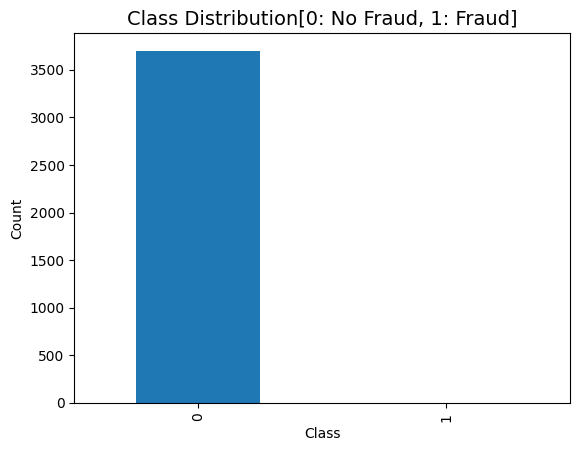

Number of Fraud Cases:  2
Number of Non-Fraud Cases:  3700


In [119]:
# Plottting the Class Distribution
df.Class.value_counts().plot(kind='bar')
plt.title('Class Distribution[0: No Fraud, 1: Fraud]', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
y=[df['Class'].value_counts()[0],df['Class'].value_counts()[1]]
print("Number of Fraud Cases: ",y[1])
print("Number of Non-Fraud Cases: ",y[0])


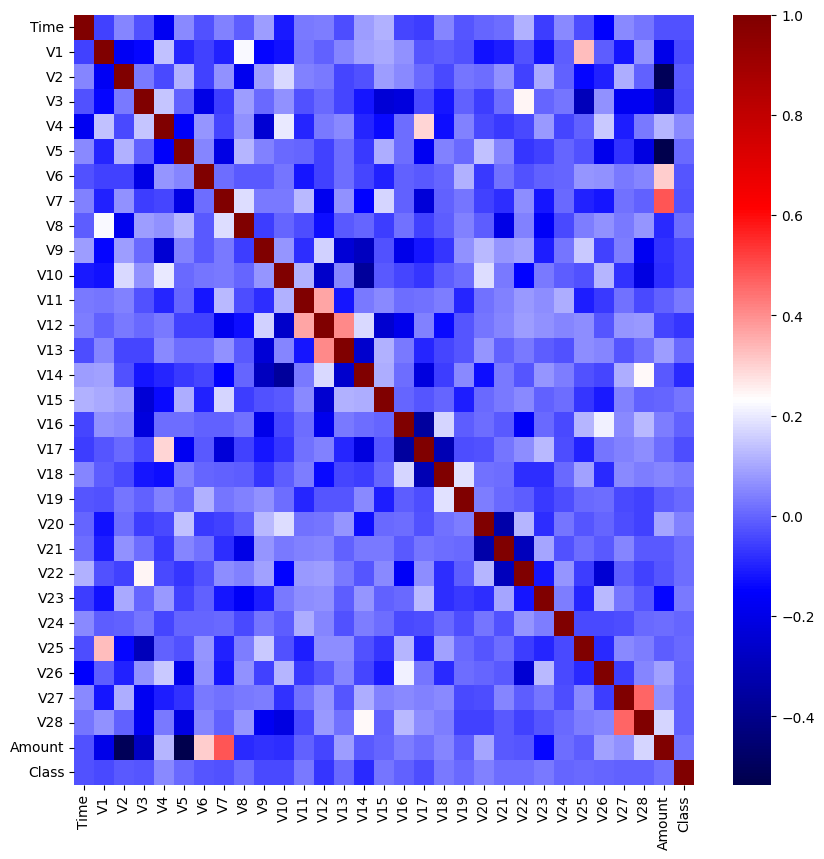

In [120]:
# Plot the Correlation Matrix 
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap="seismic")
plt.show()


(0.0, 0.005)

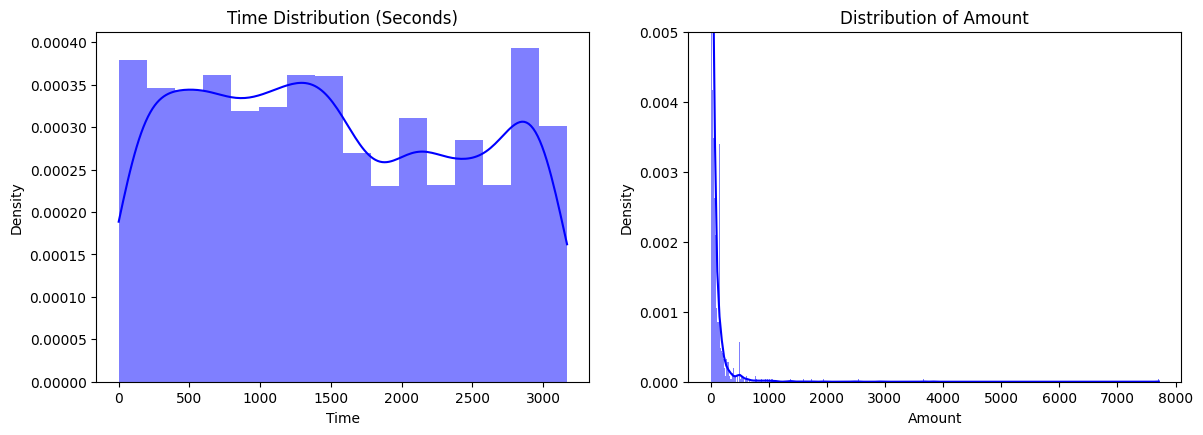

In [121]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.histplot(df['Time'], color='blue', kde=True, stat="density", linewidth=0)

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.histplot(df['Amount'],color='blue', kde=True, stat="density", linewidth=0)
plt.ylim(0, 0.0050)

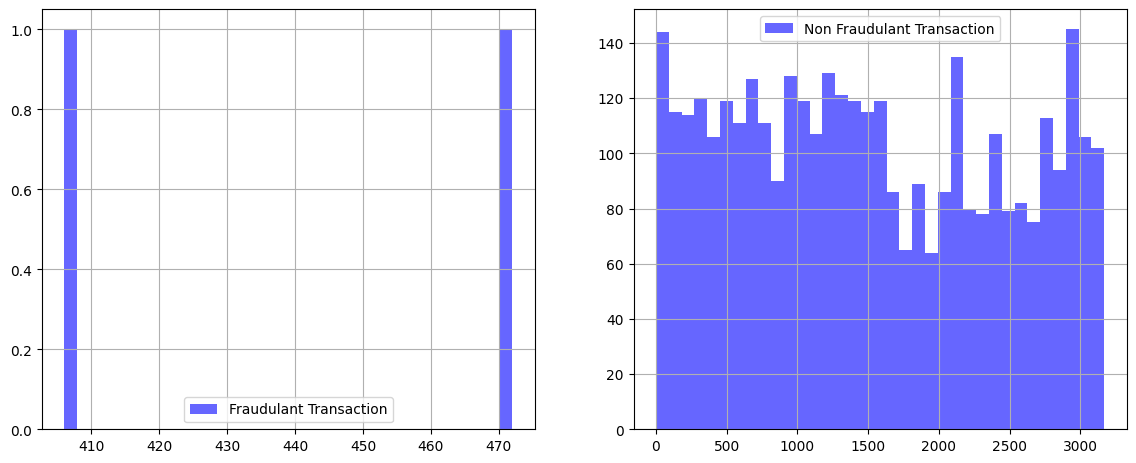

In [122]:
# Plot histogram of Time with respect to Class
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By doing the EDA we found out the following important points : 
1. There are no NaN values in the Dataset.
2. All the features except Time and Amount are already Normalized.
3. The Dataset is highly inbalanced.
4. Time doesn't make much of an impact in Fraud vs Non Fraud classification

The pre-processing will include dropping the Time Coloumn , applying Standard Scaling to the Amount Coloumn and splitting the data into training and testing set before applying SMOTE Transformation to them.

In [123]:
# Making the Pre-Processor
ss = StandardScaler()
preprocess = ColumnTransformer(transformers=[('Time_drp','drop',['Time']),('Standard_Scaler',ss, ['Amount'])],remainder='passthrough')

In [124]:
# Splitting the data into train and test
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2961, 29)
Number transactions y_train dataset:  (2961,)
Number transactions X_test dataset:  (741, 29)
Number transactions y_test dataset:  (741,)


In [129]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [137]:
from imblearn.over_sampling import SMOTE

In [143]:
pip install --upgrade imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [156]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE


In [155]:
# Oversampling the Minority Class using SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 2
Before OverSampling, counts of label '0': 2959 



AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
# Making a baseline model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [160]:
# Calculating the recall and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       0.00      0.00      0.00         0

    accuracy                           1.00       741
   macro avg       0.50      0.50      0.50       741
weighted avg       1.00      1.00      1.00       741



/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


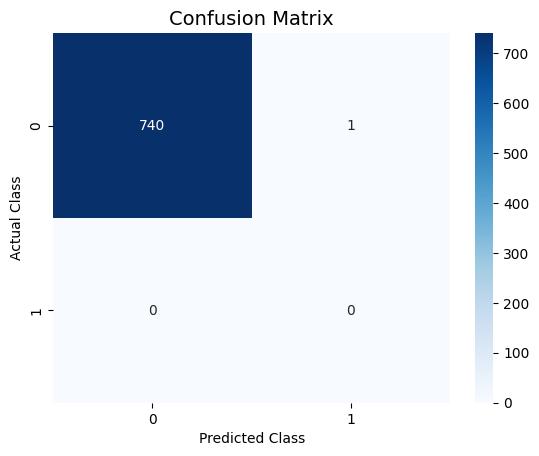

In [161]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


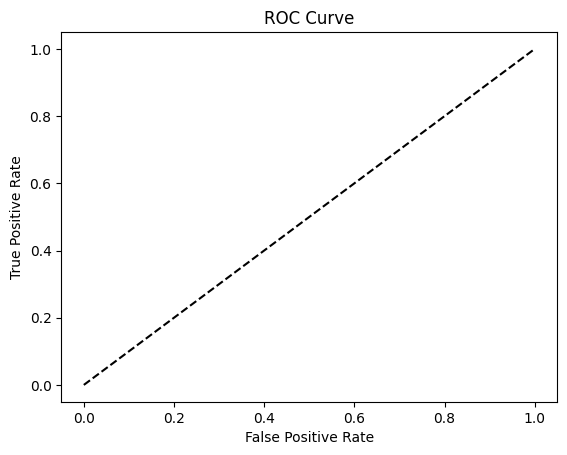

In [162]:
#Plot ROCCURVE
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [163]:
# AUC
roc_auc = auc(fpr, tpr)
roc_auc

nan

/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


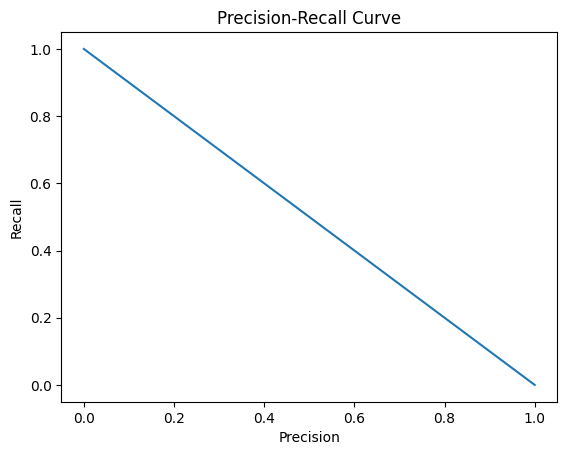

In [164]:
# Plot the Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall, label='Logistic Regression')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.show()

In [165]:
# Area under the precision-recall curve
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: -0.00


/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [167]:
# Making a Neural Network
n_inputs = X_train.shape[1]
model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.33),
    BatchNormalization(),
    Dense(2, activation='softmax')
])
callback = EarlyStopping(monitor='val_loss',patience=3)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116 (8.27 KB)

 Trainable params: 2,052 (8.02 KB)

 Non-trainable params: 64 (256.00 B)

In [169]:
#Fitting the Model
model.fit(X_train, y_train, validation_split=0.2,epochs=30, batch_size=350,verbose=1,callbacks=[callback])

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3647 - loss: 0.8600 - val_accuracy: 0.9899 - val_loss: 0.1855
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3937 - loss: 0.7936 - val_accuracy: 0.9882 - val_loss: 0.3302
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4484 - loss: 0.7337 - val_accuracy: 0.9949 - val_loss: 0.5296
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5555 - loss: 0.6769 - val_accuracy: 0.9174 - val_loss: 0.6297


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       741
           1       0.00      0.00      0.00         0

    accuracy                           0.94       741
   macro avg       0.50      0.47      0.48       741
weighted avg       1.00      0.94      0.97       741



/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


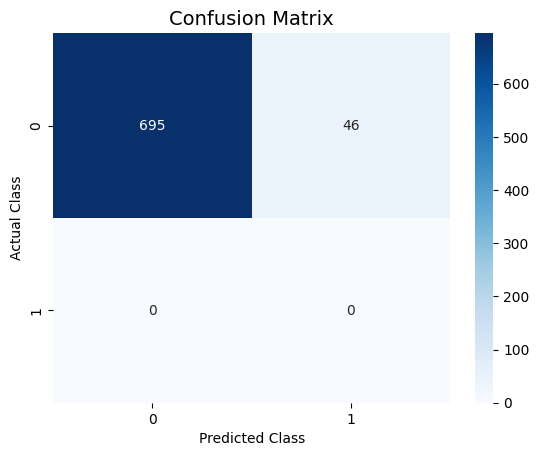

In [170]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


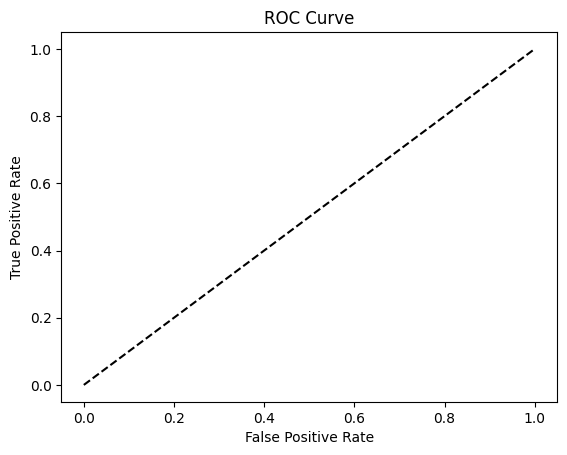

In [171]:
# Plot ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [172]:
#AUC 
roc_auc = auc(fpr, tpr)
roc_auc

nan

In [173]:
# Area under the precision-recall curve
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: -0.00


/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
